In [3]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 2.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=87b28ac0d3c61d47fa6e4b708ac8a134a030a8a93deb9eecf96c8d3cba262e68
  Stored in directory: /home/jovyan/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [171]:
#Importing Necessary Packages
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [261]:
emissions_df = pd.read_csv("MY2022_Fuel_Consumption_Ratings.csv", encoding='cp1252',
                 nrows=882, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14], index_col=False)

emissions_df = emissions_df[['Engine_Size','Cylinders','Fuel_Consumption_City','Fuel_Consumption_Hwy','Fuel_Consumption_Comb','CO2_Emissions','CO2_Rating','Smog_Rating']]
emissions_df.sample(4)

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,CO2_Emissions,CO2_Rating,Smog_Rating
129,4.4,8,15.7,11.5,13.8,321,3,3
872,2.0,4,10.4,7.5,9.1,212,5,7
840,2.5,4,8.7,6.9,7.9,184,6,6
465,2.0,4,10.7,9.8,10.3,241,5,5


<AxesSubplot:>

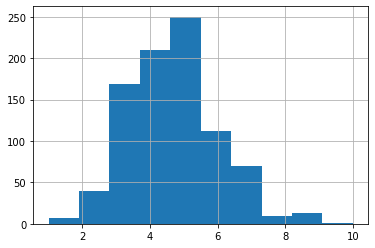

In [471]:
emissions_df.CO2_Rating.hist()

<AxesSubplot:>

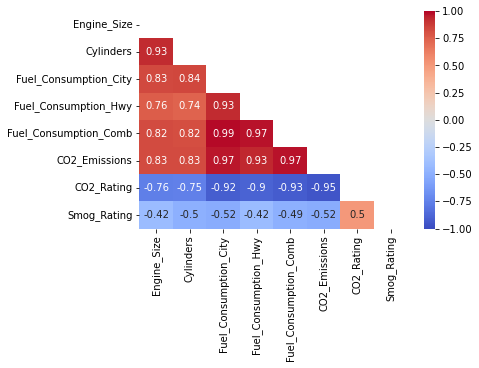

In [466]:
upp_mat = np.triu(emissions_df.corr())
sns.heatmap(emissions_df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)

In [30]:
# summarize the data
emissions_df.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,CO2_Emissions,CO2_Rating,Smog_Rating
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,3.117234,5.600907,12.392404,9.320295,11.009751,257.041950,4.595238,5.004535
std,1.317316,1.941692,3.471466,2.306278,2.899504,64.782264,1.479523,1.630436
min,1.200000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000,1.000000
25%,2.000000,4.000000,10.100000,7.600000,9.000000,211.000000,4.000000,3.000000
50%,3.000000,6.000000,12.100000,9.100000,10.700000,254.000000,5.000000,5.000000
75%,3.600000,6.000000,14.500000,10.600000,12.700000,298.000000,5.000000,6.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,10.000000,7.000000


In [676]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
Engine_Size = ctrl.Antecedent(np.arange(1.2, 8, 0.1), 'Engine Size')
Cylinders = ctrl.Antecedent(np.arange(3, 16, 1), 'Cylinders')
Fuel_Consumption_City = ctrl.Antecedent(np.arange(4, 31, 1), 'Fuel Consumption City')
Fuel_Consumption_Hwy = ctrl.Antecedent(np.arange(3.9, 21, 1), 'Fuel Consumption Hwy')
CO2_Emissions = ctrl.Consequent(np.arange(94, 608, 1), 'CO2 Emissions')

In [677]:
# Auto-membership function population is possible with .automf(3, 5, or 7)
#names = ['nb', 'ns', 'ze', 'ps', 'pb']
Engine_Size.automf(5)
Cylinders.automf(5)
Fuel_Consumption_City.automf(5)
Fuel_Consumption_Hwy.automf(5)
CO2_Emissions.automf(5)

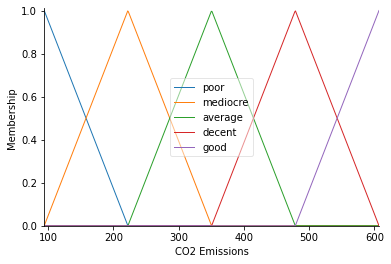

In [678]:
CO2_Emissions.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

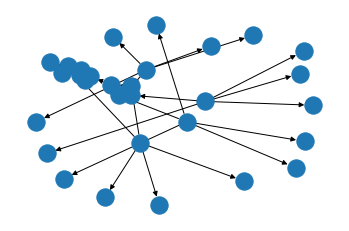

In [679]:
#rule0 = ctrl.Rule(Engine_Size['dismal'] | Cylinders['dismal'] | Fuel_Consumption_City['dismal'] | Fuel_Consumption_Hwy['dismal'], CO2_Emissions['dismal'])
rule1 = ctrl.Rule(Engine_Size['poor'] | Cylinders['poor'] | Fuel_Consumption_City['poor'] | Fuel_Consumption_Hwy['poor'], CO2_Emissions['poor'])
rule2 = ctrl.Rule(Engine_Size['mediocre'] | Cylinders['mediocre'] | Fuel_Consumption_City['mediocre'] | Fuel_Consumption_Hwy['mediocre'], CO2_Emissions['mediocre'])
rule3 = ctrl.Rule(Engine_Size['average'] | Cylinders['average'] | Fuel_Consumption_City['average'] | Fuel_Consumption_Hwy['average'], CO2_Emissions['average'])
rule4 = ctrl.Rule(Engine_Size['decent'] | Cylinders['decent'] | Fuel_Consumption_City['decent'] | Fuel_Consumption_Hwy['decent'], CO2_Emissions['decent'])
rule5 = ctrl.Rule(Engine_Size['good'] | Cylinders['good'] | Fuel_Consumption_City['good'] | Fuel_Consumption_Hwy['good'], CO2_Emissions['good'])
#rule6 = ctrl.Rule(Engine_Size['excellent'] | Cylinders['excellent'] | Fuel_Consumption_City['excellent'] | Fuel_Consumption_Hwy['excellent'], CO2_Emissions['excellent'])
rule1.view()

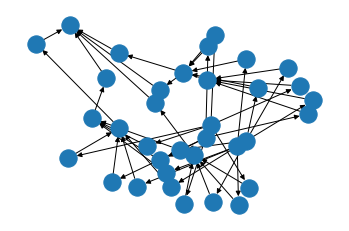

In [685]:
#tipping_ctrl = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4, rule5, rule6])
co2_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
co2_ctrl.view()

In [686]:
co2 = ctrl.ControlSystemSimulation(co2_ctrl)

In [687]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
co2.input['Engine Size'] = 4.4
co2.input['Cylinders'] = 8
co2.input['Fuel Consumption City'] = 15.7
co2.input['Fuel Consumption Hwy'] = 11.5

# Crunch the numbers
co2.compute()

307.4920513636081


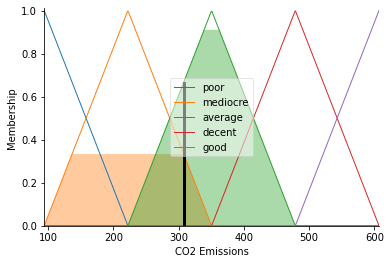

In [688]:
print(co2.output['CO2 Emissions'])
CO2_Emissions.view(sim=tipping)

In [690]:
emissions_df['CO2_Emissions_predicted'] = ''
for i in emissions_df.index:
    co2.input['Engine Size'] = emissions_df['Engine_Size'][i]
    co2.input['Cylinders'] = emissions_df['Cylinders'][i]
    co2.input['Fuel Consumption City'] = emissions_df['Fuel_Consumption_City'][i]
    co2.input['Fuel Consumption Hwy'] = emissions_df['Fuel_Consumption_Hwy'][i]
    co2.compute()
    emissions_df['CO2_Emissions_predicted'][i] = co2.output['CO2 Emissions']

/tmp/ipykernel_116/3815045209.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emissions_df['CO2_Emissions_predicted'][i] = co2.output['CO2 Emissions']


In [691]:
emissions_df.sample(5)

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,CO2_Emissions,CO2_Rating,Smog_Rating,CO2_Emissions_predicted
444,1.6,4,8.6,6.8,7.8,184,6,5,201.694364
171,3.6,6,12.3,8.8,10.7,252,5,6,271.977156
280,2.7,6,13.5,10.1,12.0,282,4,6,273.002533
858,2.0,4,9.8,6.9,8.5,198,6,5,205.016474
868,2.0,4,10.6,8.0,9.4,222,5,7,212.828752


In [692]:
print('*'*64)
print('MSE:', mean_absolute_error(emissions_df['CO2_Emissions'], emissions_df['CO2_Emissions_predicted']))
print("R2-score: %.2f" % r2_score(emissions_df['CO2_Emissions'], emissions_df['CO2_Emissions_predicted']))

****************************************************************
MSE: 18.768845996190198
R2-score: 0.85


In [266]:
print('*'*64)
print('MSE:', mean_absolute_error(emissions_df['CO2_Emissions'], emissions_df['CO2_Emissions_predicted']))
print("R2-score: %.2f" % r2_score(emissions_df['CO2_Emissions'], emissions_df['CO2_Emissions_predicted']))

****************************************************************
MSE: 65.32274742387757
R2-score: -0.31


# Implementación Manual

In [348]:
# summarize the data
emissions_df.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,CO2_Emissions,CO2_Rating,Smog_Rating
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,3.117234,5.600907,12.392404,9.320295,11.009751,257.041950,4.595238,5.004535
std,1.317316,1.941692,3.471466,2.306278,2.899504,64.782264,1.479523,1.630436
min,1.200000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000,1.000000
25%,2.000000,4.000000,10.100000,7.600000,9.000000,211.000000,4.000000,3.000000
50%,3.000000,6.000000,12.100000,9.100000,10.700000,254.000000,5.000000,5.000000
75%,3.600000,6.000000,14.500000,10.600000,12.700000,298.000000,5.000000,6.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,10.000000,7.000000


In [559]:
Engine_Size = ctrl.Antecedent(np.arange(1.2, 8, 1), 'Engine Size')
Cylinders = ctrl.Antecedent(np.arange(3, 16, 1), 'Cylinders')
Fuel_Consumption_City = ctrl.Antecedent(np.arange(4, 31, 1), 'Fuel Consumption City')
Fuel_Consumption_Hwy = ctrl.Antecedent(np.arange(3.9, 21, 1), 'Fuel Consumption Hwy')
CO2_Emissions = ctrl.Consequent(np.arange(94, 608, 1), 'CO2 Emissions')

In [560]:
Engine_Size['poor'] = fuzz.trimf(Engine_Size.universe, [1.2, 1.2, 2])
Engine_Size['mediocre'] = fuzz.trimf(Engine_Size.universe, [1.2, 2, 3])
Engine_Size['average'] = fuzz.trimf(Engine_Size.universe, [2, 3, 3.6])
Engine_Size['decent'] = fuzz.trimf(Engine_Size.universe, [3, 3.6, 8])
Engine_Size['good'] = fuzz.trimf(Engine_Size.universe, [3.6, 8, 8])

In [561]:
Cylinders['poor'] = fuzz.trimf(Cylinders.universe, [3, 3, 4])
Cylinders['mediocre'] = fuzz.trimf(Cylinders.universe, [3, 4, 6])
Cylinders['average'] = fuzz.trimf(Cylinders.universe, [4, 5.5, 6.5])
Cylinders['decent'] = fuzz.trimf(Cylinders.universe, [6, 6.5, 16])
Cylinders['good'] = fuzz.trimf(Cylinders.universe, [6.5, 16, 16])

In [562]:
Fuel_Consumption_City['poor'] = fuzz.trimf(Fuel_Consumption_City.universe, [4, 4, 10.1])
Fuel_Consumption_City['mediocre'] = fuzz.trimf(Fuel_Consumption_City.universe, [4, 10.1, 12.1])
Fuel_Consumption_City['average'] = fuzz.trimf(Fuel_Consumption_City.universe, [10.1, 12.1, 14.5])
Fuel_Consumption_City['decent'] = fuzz.trimf(Fuel_Consumption_City.universe, [12.1, 14.5, 31])
Fuel_Consumption_City['good'] = fuzz.trimf(Fuel_Consumption_City.universe, [14.5, 31, 31])

In [563]:
Fuel_Consumption_Hwy['poor'] = fuzz.trimf(Fuel_Consumption_Hwy.universe, [3.9, 3.9, 7.6])
Fuel_Consumption_Hwy['mediocre'] = fuzz.trimf(Fuel_Consumption_Hwy.universe, [3.9, 7.6, 9.1])
Fuel_Consumption_Hwy['average'] = fuzz.trimf(Fuel_Consumption_Hwy.universe, [7.6, 9.1, 10.6])
Fuel_Consumption_Hwy['decent'] = fuzz.trimf(Fuel_Consumption_Hwy.universe, [9.1, 10.6, 21])
Fuel_Consumption_Hwy['good'] = fuzz.trimf(Fuel_Consumption_Hwy.universe, [10.6, 21, 21])

In [564]:
CO2_Emissions['poor'] = fuzz.trimf(CO2_Emissions.universe, [94, 94, 211])
CO2_Emissions['mediocre'] = fuzz.trimf(CO2_Emissions.universe, [94, 211, 254])
CO2_Emissions['average'] = fuzz.trimf(CO2_Emissions.universe, [211, 254, 298])
CO2_Emissions['decent'] = fuzz.trimf(CO2_Emissions.universe, [254, 298, 608])
CO2_Emissions['good'] = fuzz.trimf(CO2_Emissions.universe, [298, 608, 608])

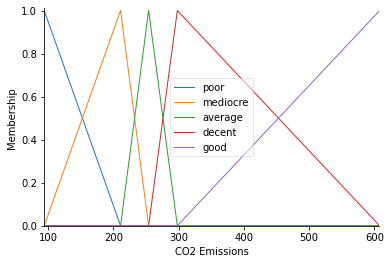

In [565]:
CO2_Emissions.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

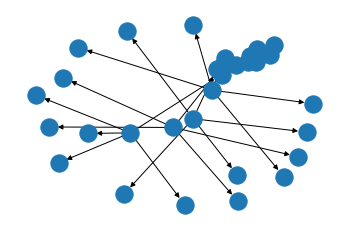

In [566]:
rule1 = ctrl.Rule(Engine_Size['poor'] | Cylinders['poor'] | Fuel_Consumption_City['poor'] | Fuel_Consumption_Hwy['poor'], CO2_Emissions['poor'])
rule2 = ctrl.Rule(Engine_Size['mediocre'] | Cylinders['mediocre'] | Fuel_Consumption_City['mediocre'] | Fuel_Consumption_Hwy['mediocre'], CO2_Emissions['mediocre'])
rule3 = ctrl.Rule(Engine_Size['average'] | Cylinders['average'] | Fuel_Consumption_City['average'] | Fuel_Consumption_Hwy['average'], CO2_Emissions['average'])
rule4 = ctrl.Rule(Engine_Size['decent'] | Cylinders['decent'] | Fuel_Consumption_City['decent'] | Fuel_Consumption_Hwy['decent'], CO2_Emissions['decent'])
rule5 = ctrl.Rule(Engine_Size['good'] | Cylinders['good'] | Fuel_Consumption_City['good'] | Fuel_Consumption_Hwy['good'], CO2_Emissions['good'])
rule1.view()

In [567]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [557]:
emissions_df['CO2_Emissions_predicted'] = ''
for i in emissions_df.index:
    tipping.input['Engine Size'] = emissions_df['Engine_Size'][i]
    tipping.input['Cylinders'] = emissions_df['Cylinders'][i]
    tipping.input['Fuel Consumption City'] = emissions_df['Fuel_Consumption_City'][i]
    tipping.input['Fuel Consumption Hwy'] = emissions_df['Fuel_Consumption_Hwy'][i]
    tipping.compute()
    emissions_df['CO2_Emissions_predicted'][i] = tipping.output['CO2 Emissions']

/tmp/ipykernel_116/3340373768.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emissions_df['CO2_Emissions_predicted'][i] = tipping.output['CO2 Emissions']


In [558]:
print('*'*64)
print('MSE:', mean_absolute_error(emissions_df['CO2_Emissions'], emissions_df['CO2_Emissions_predicted']))
print("R2-score: %.2f" % r2_score(emissions_df['CO2_Emissions'], emissions_df['CO2_Emissions_predicted']))

****************************************************************
MSE: 51.72471281246764
R2-score: 0.12


# Rule application

Now, to make these triangles useful, we define the fuzzy relationship between input and output variables.